**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"             
 [2] "hclust.col.annotation.prepare.chipseq_full.only.rds"                
 [3] "hclust.col.annotation.test_chrX.chipseq_full.only.rds"              
 [4] "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"             
 [5] "hclust.row.annotation.prepare.chipseq_full.only.rds"                
 [6] "hclust.row.annotation.test_chrX.chipseq_full.only.rds"              
 [7] "matrix.annotation.chipseq_flagship.tsv"                             
 [8] "matrix.annotation.chipseq_full.tsv"                                 
 [9] "matrix.annotation.chipseq_histone.tsv"                              
[10] "matrix.annotation.chipseq_subset.tsv"                               
[11] "matrix.annotation.fcc_peak_call.tsv"                                
[12] "matrix.annotation.genome_tss.tsv"                                   
[13] "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"                   
[14] "matrix.annotation.p

## Import data

In [3]:
vec_num_neighbors = c(15, 50, 60, 70, 90)

In [4]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
vec = vec_num_neighbors
lst = lapply(vec, function(num){
    
    ### set directory
    txt_fnote = paste("n_neighbors", num, sep = "_")
    txt_fname  = paste(
        "umap",
        txt_fnote,
        "annotation.prepare.cre.chipseq_full.fcc.tss.tsv",
        sep = ".")
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec

### assign
lst_dat_umap = lst

#txt_fname = "umap.n_neighbors_70.annotation.prepare.chipseq_full.fcc.tss.tsv"
#txt_fname = "umap.n_neighbors_70.annotation.prepare.chipseq_full.only.tsv"

In [5]:
lst = lst_dat_umap
head(lst[[1]])

UMAP1,UMAP2,Region
<dbl>,<dbl>,<chr>
-6.6478806,5.535943,chr1:10038-10405
-0.7645907,10.343412,chr1:16025-16338
-5.0694920,5.989547,chr1:17288-17689
-10.2225920,8.712837,chr1:28934-29499
1.9803503,7.451761,chr1:115429-115969
-3.1442347,2.872845,chr1:136201-137353


In [6]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    txt = paste("N_Neighbors", "=", txt)
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point() + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

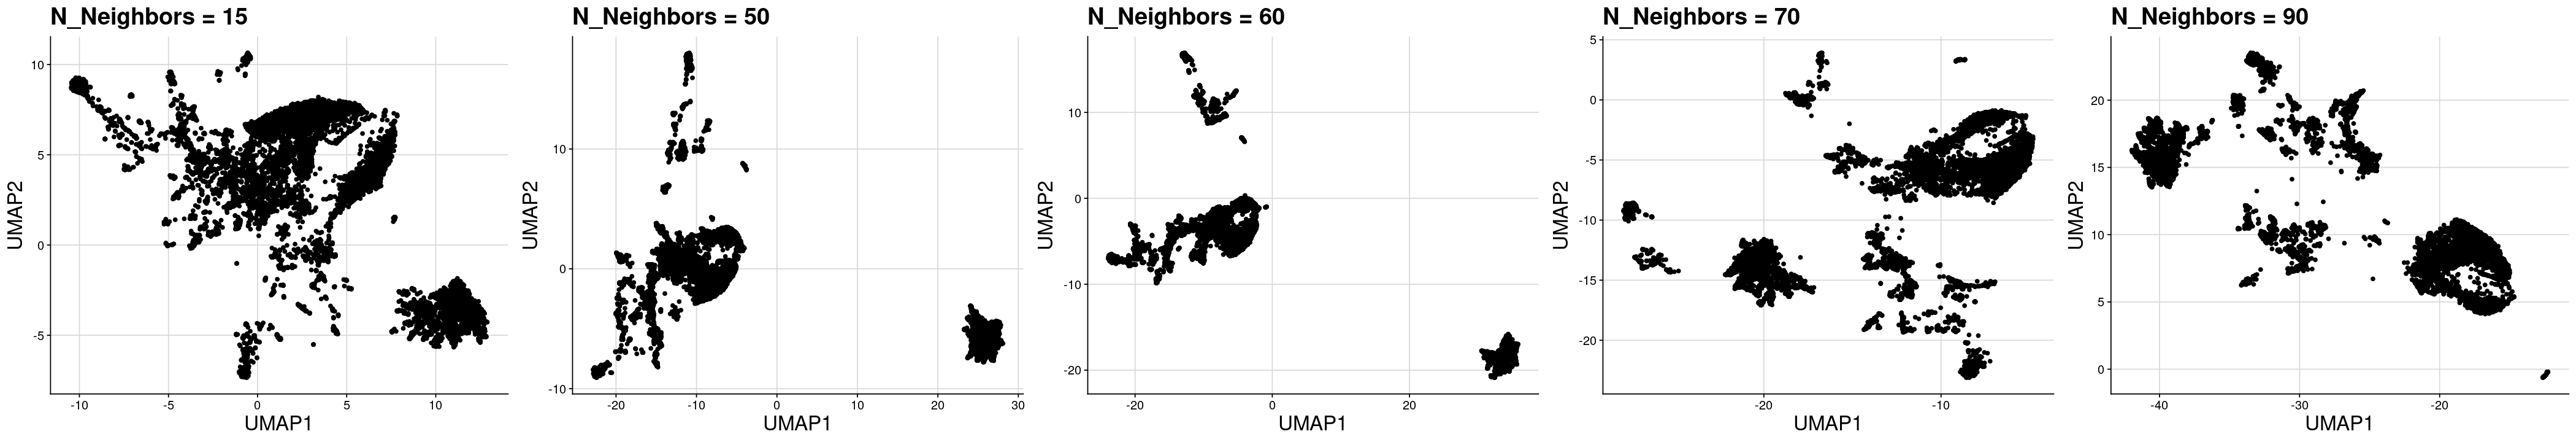

In [7]:
options(repr.plot.height=6, repr.plot.width=35)
plot_grid(plotlist = lst_gpt, nrow=1)

In [8]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
vec = vec_num_neighbors
lst = lapply(vec, function(num){
    
    ### set directory
    txt_fnote = paste("n_neighbors", num, sep = "_")
    txt_fname  = paste(
        "umap",
        txt_fnote,
        "annotation.prepare.enh.chipseq_full.fcc.tss.tsv",
        sep = ".")
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec

### assign
lst_dat_umap = lst

#txt_fname = "umap.n_neighbors_70.annotation.prepare.chipseq_full.fcc.tss.tsv"
#txt_fname = "umap.n_neighbors_70.annotation.prepare.chipseq_full.only.tsv"

In [9]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    txt = paste("N_Neighbors", "=", txt)
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point() + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

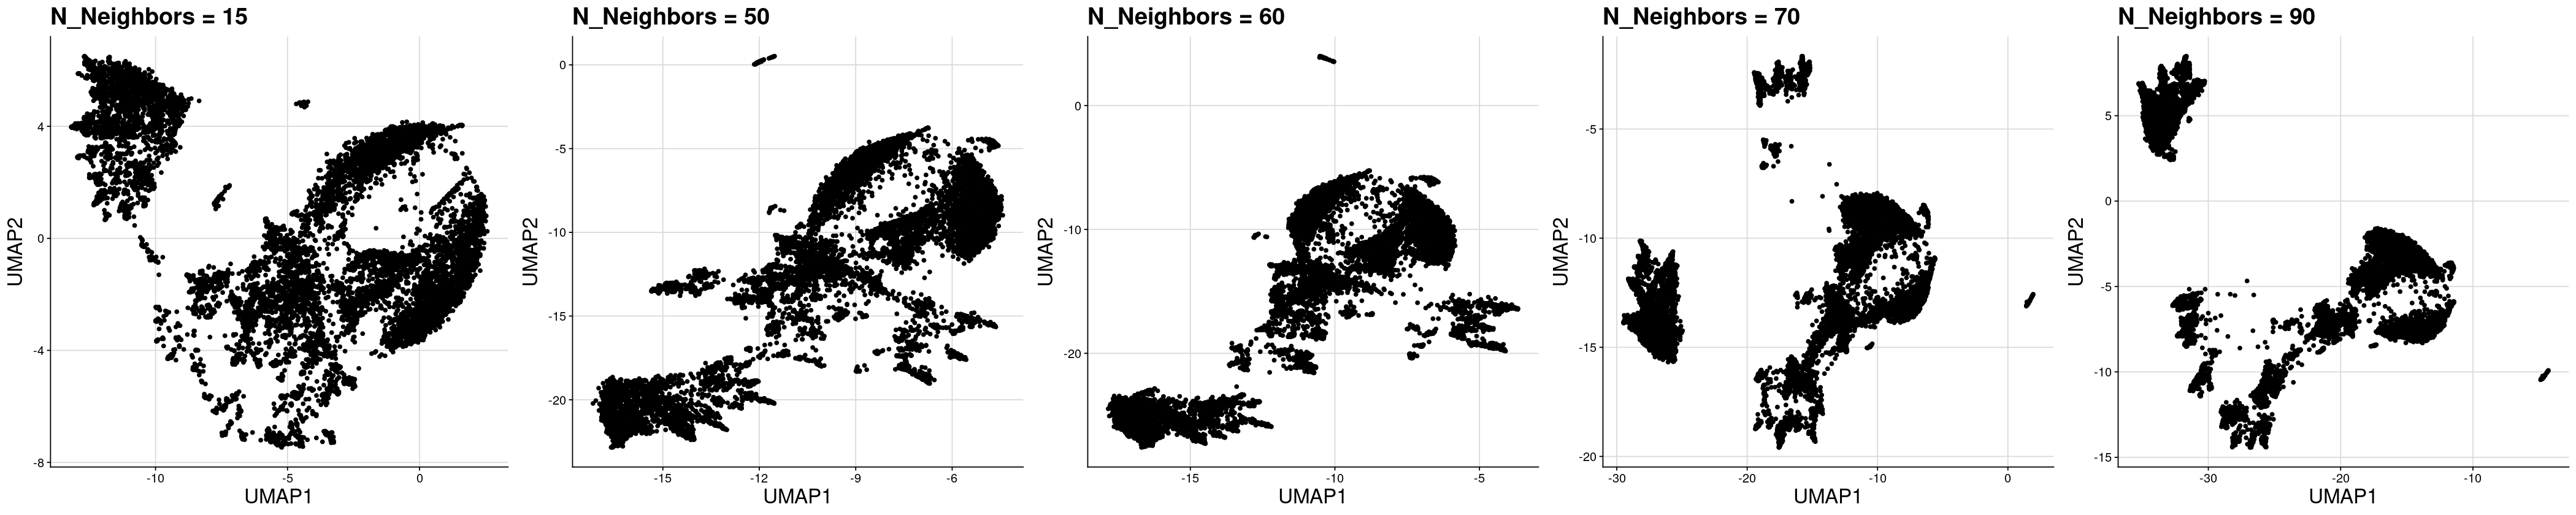

In [11]:
options(repr.plot.height=7, repr.plot.width=35)
plot_grid(plotlist = lst_gpt, nrow=1)